
Case 1: Respiratory Symptoms


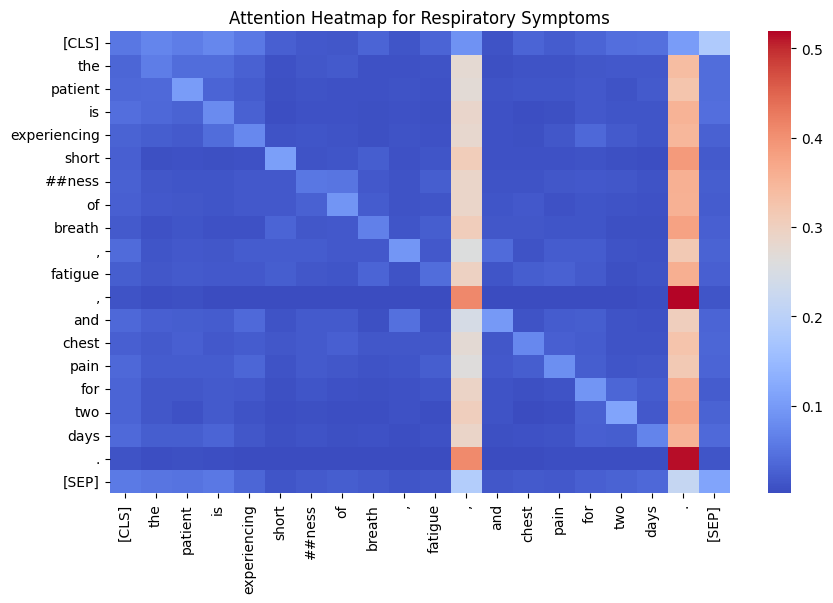


Token-wise Attention Analysis:
[CLS]: 0.0311
the: 0.0237
patient: 0.0256
is: 0.0263
experiencing: 0.0232
short: 0.0168
##ness: 0.0154
of: 0.0184
breath: 0.0157
,: 0.0155
fatigue: 0.0143
,: 0.2812
and: 0.0161
chest: 0.0152
pain: 0.0169
for: 0.0224
two: 0.0198
days: 0.0169
.: 0.3456
[SEP]: 0.0397

Case 2: Neurological Symptoms


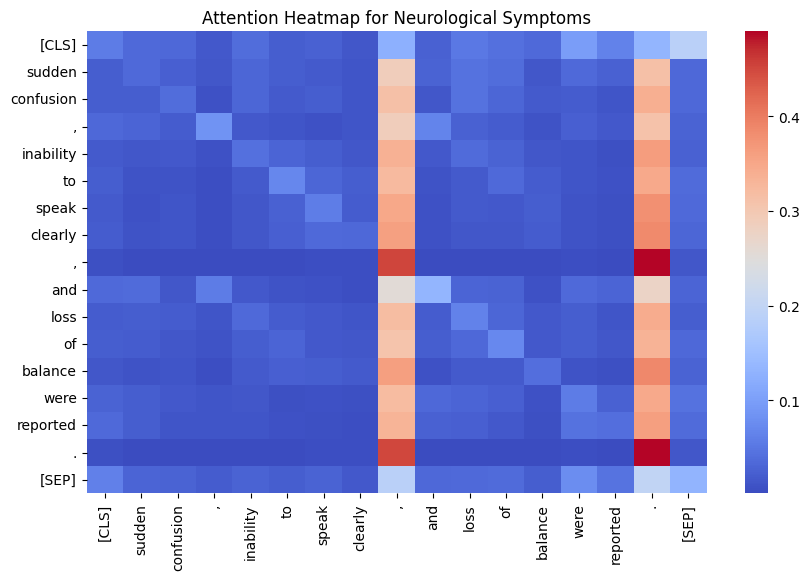


Token-wise Attention Analysis:
[CLS]: 0.0258
sudden: 0.0193
confusion: 0.0168
,: 0.0160
inability: 0.0212
to: 0.0203
speak: 0.0197
clearly: 0.0129
,: 0.3159
and: 0.0266
loss: 0.0288
of: 0.0267
balance: 0.0163
were: 0.0292
reported: 0.0192
.: 0.3408
[SEP]: 0.0446

Case 3: Gastrointestinal Symptoms


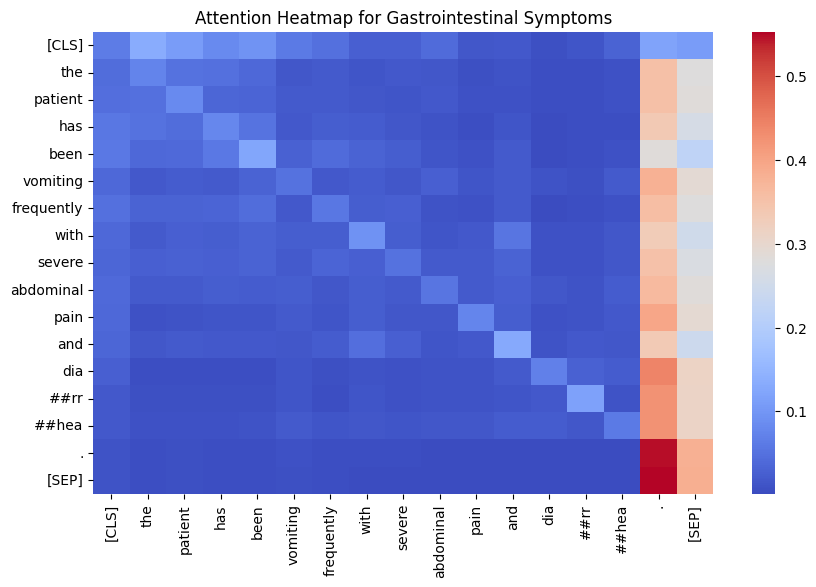


Token-wise Attention Analysis:
[CLS]: 0.0363
the: 0.0301
patient: 0.0301
has: 0.0288
been: 0.0327
vomiting: 0.0219
frequently: 0.0215
with: 0.0242
severe: 0.0183
abdominal: 0.0177
pain: 0.0154
and: 0.0255
dia: 0.0119
##rr: 0.0155
##hea: 0.0163
.: 0.3735
[SEP]: 0.2802

Case 4: General Well-being


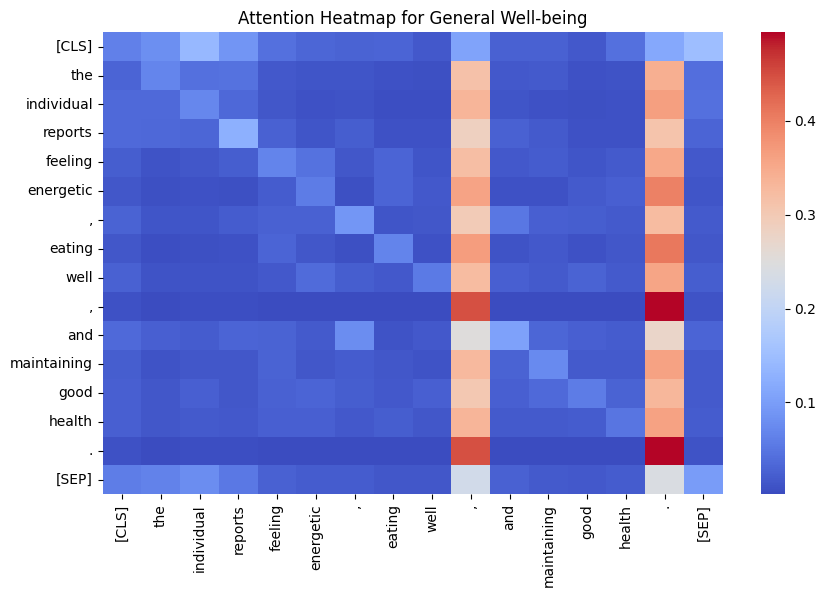


Token-wise Attention Analysis:
[CLS]: 0.0284
the: 0.0250
individual: 0.0317
reports: 0.0315
feeling: 0.0250
energetic: 0.0225
,: 0.0235
eating: 0.0184
well: 0.0146
,: 0.3154
and: 0.0252
maintaining: 0.0215
good: 0.0172
health: 0.0194
.: 0.3460
[SEP]: 0.0348


In [2]:
# Import Required Libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel

# Load BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)

# Function to Compute Attention Scores
def compute_attention(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    attention_scores = outputs.attentions[-1]  # Last layer attention
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze())
    return attention_scores, tokens

# Function to Display Attention Heatmap
def display_attention_heatmap(text, title="Attention Score Visualization"):
    attention_scores, tokens = compute_attention(text)
    attn_matrix = attention_scores.squeeze().mean(dim=0).detach().numpy()

    plt.figure(figsize=(10, 6))
    sns.heatmap(attn_matrix, xticklabels=tokens, yticklabels=tokens, cmap="coolwarm", annot=False)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

# Function to Analyze Token Attention
def analyze_token_attention(text):
    attention_scores, tokens = compute_attention(text)
    attn_matrix = attention_scores.squeeze().mean(dim=0).detach().numpy()
    
    print("\nToken-wise Attention Analysis:")
    for token, score in zip(tokens, np.mean(attn_matrix, axis=0)):
        print(f"{token}: {score:.4f}")

# Example Cases

# Case 1: Respiratory Symptoms
text1 = "The patient is experiencing shortness of breath, fatigue, and chest pain for two days."
print("\nCase 1: Respiratory Symptoms")
display_attention_heatmap(text1, title="Attention Heatmap for Respiratory Symptoms")
analyze_token_attention(text1)

# Case 2: Neurological Symptoms
text2 = "Sudden confusion, inability to speak clearly, and loss of balance were reported."
print("\nCase 2: Neurological Symptoms")
display_attention_heatmap(text2, title="Attention Heatmap for Neurological Symptoms")
analyze_token_attention(text2)

# Case 3: Gastrointestinal Symptoms
text3 = "The patient has been vomiting frequently with severe abdominal pain and diarrhea."
print("\nCase 3: Gastrointestinal Symptoms")
display_attention_heatmap(text3, title="Attention Heatmap for Gastrointestinal Symptoms")
analyze_token_attention(text3)

# Case 4: General Well-being
text4 = "The individual reports feeling energetic, eating well, and maintaining good health."
print("\nCase 4: General Well-being")
display_attention_heatmap(text4, title="Attention Heatmap for General Well-being")
analyze_token_attention(text4)

